In [1]:
from time import time
from sage.coding.bounds_catalog import *


n = 9
k = 7
q = 8



w = 1
p = 1


def complementaire(I, n):
    return set([1..n]).difference(I)

def canal(x, nb_err, K):
    n = len(x)
    I = Subsets(n,nb_err).random_element()
    y = []
    for i in range(n):
        y.append(x[i])
        if i+1 in I:
            err = 0
            while err == 0:
                err = K.random_element()
            y[i] += err
    return vector(K,y)




def lee_brickel(H, s, w):
    
    while True:
        I = S.random_element()
        J = complementaire(I, n)
        Hj = H[[i for i in range(0,n-k)],[j for j in range(0,n) if (j+1) in J ]]
        if Hj.determinant() == 0:
            continue
        sj = vector(K,s)
        Hj_inv = Hj.inverse()
        sp = Hj_inv * sj
        V = VectorSpace(K, k)
        for x in V:
            if x.hamming_weight() == p:
                Hi = H[[i for i in range(0,n-k)],[j for j in range(0,n) if (j+1) in I ]]
                y = sp - Hj_inv * Hi * x
                if y.hamming_weight() <= w - p:
                    e = []
                    j = 0
                    for i in range(n):
                        if i + 1 in J:
                            e.append(sp[j])
                            j+= 1
                        else:
                            e.append(0)
                    return vector(K,e)
                
def lee_brickel2(H, s, w):
    if s == vector(K, [0 for i in range(n-k)]):
        return vector(K, [0 for i in range(n)])
    S = Subsets(n,k)
    
    positions = Subsets(k, p)
    Values = []
    for lmt in K:
        Values.append(lmt)
    Values.remove(0)
    Index = (IntegerModRing(len(Values)))^p
    
    while True:
        I = S.random_element()
        J = complementaire(I, n)
        Hj = H[[i for i in range(0,n-k)],[j for j in range(0,n) if (j+1) in J ]]
        if Hj.determinant() == 0:
            continue
        sj = vector(K,s)
        Hj_inv = Hj.inverse()
        sp = Hj_inv * sj
        

        
        for pos in positions: #emplacement des valeurs non nulles du vecteur x
            x = vector(K, [0]*k)
            for index in Index: # vecteur de (Z/(|K|-1)Z ), permet de parcourir toutes vecteurs de p dans K sans aucune coordonnée nulle
                for a in range(p):
                    x[pos[a] - 1] = Values[ index[a] ]
                #print("x : ",x)
                Hi = H[[l for l in range(0,n-k)],[m for m in range(0,n) if (m+1) in I ]]
                y = sp - Hj_inv * Hi * x
                if y.hamming_weight() <= w - p:
                    e = [0]*n
                    j1 = 0
                    j2 = 0
                    for i in range(n):
                        if i + 1 in J:
                            e[i] = y[j1] #e.append(y[j])
                            j1+= 1
                        else:
                            e[i] = x[j2]
                            j2 += 1
                    #print("I:",I,"J:", J)
                    #print("Hi\n",Hi)
                    #print("Hj\n",Hj)
                    #print(Hj_inv)
                    return vector(K,e)

def complexity(n, k, q, w ):
    R = k/n
    gama = max(0,w - (1-1/q)*(1-R))
    alpha = gama*log(q-1,q) + entropy(w, q) - (1-R)*entropy((w - gama)/(1 - R))
    return q^(alpha*n)

# Test sur Hamming [9,7,3] sur F8

In [2]:
K.<g> = GF(q)
H = Matrix(K,[[1,g,g^2,g+1,g^2+g, g^2+1, g^2+g+1,1,0],[1,1,1,1,1,1,1,0,1]])
G = Matrix(K,[[1,0,0,0,0,0,0,1,1],[0,1,0,0,0,0,0,g,1],[0,0,1,0,0,0,0,g^2,1],[0,0,0,1,0,0,0,g+1,1],[0,0,0,0,1,0,0,g^2+g,1], [0,0,0,0,0,1,0,g^2+1,1], [0,0,0,0,0,0,1,g^2+g+1,1]])
print(H)
M = K^k
m = vector(K,M.random_element())
c = m*G
print("mot de code c :" ,c)
u = canal(c, 1, K)
print("Mot reçu avec une erreur :", u)
s = H*u
print("Syndrôme obtenu :",s)
t1 = time()
e = lee_brickel2(H, s, w)
t2 = time()
print("Erreur trouvée :", e)
cp = u + e
print("Mot décodé :",cp)
print("Mod bien décodé :", c == cp)
print("time to decode :", t2-t1 ," seconds")

[          1           g         g^2       g + 1     g^2 + g     g^2 + 1 g^2 + g + 1           1           0]
[          1           1           1           1           1           1           1           0           1]
mot de code c : (g^2 + 1, g^2 + g + 1, g + 1, g^2 + g + 1, g + 1, g^2, 1, 1, 0)
Mot reçu avec une erreur : (0, g^2 + g + 1, g + 1, g^2 + g + 1, g + 1, g^2, 1, 1, 0)
Syndrôme obtenu : (g^2 + 1, g^2 + 1)
Erreur trouvée : (g^2 + 1, 0, 0, 0, 0, 0, 0, 0, 0)
Mot décodé : (g^2 + 1, g^2 + g + 1, g + 1, g^2 + g + 1, g + 1, g^2, 1, 1, 0)
Mod bien décodé : True
time to decode : 0.0437617301940918  seconds


# Calcul de la complexité asymptotique

Complexity with n =  2500  ,k =  1250  ,q =  2  ,w =  0.100000000000000  : 
 2.00373216355136e81


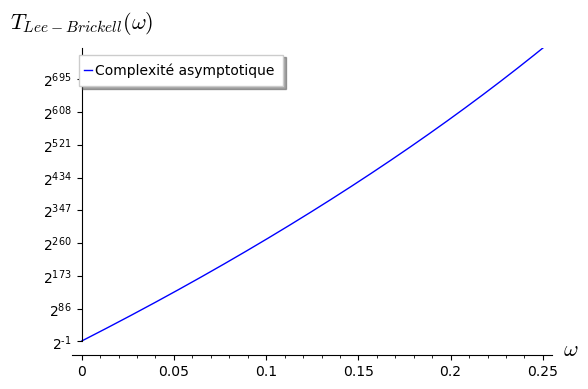

In [4]:
n = 2500
R = 0.5
k = floor(R*n)
q = 2
w_max = (1-R)*(1-1/q)
w = 0.1
print("Complexity with n = ", n, " ,k = ", k," ,q = ", q," ,w = ", w, " : \n", complexity(n,k,q,w))



    
c = lambda x : q^(n*(max(0,x - w_max)*log(q-1,q) + entropy(x, q) - (1-R)*entropy((x - max(0,x - w_max))/(1 - R),q)))
plot(c, (0,w_max), scale = 'semilogy', base = 2, axes_labels = [r'$\omega$',r'$T_{Lee-Brickell}(\omega)$'], legend_label = 'Complexité asymptotique')